# Trees, Forests, and Ensembles

![japanese maple](assets/trees/japanese-maple-2947680_640.jpg)

(image: [pixabay](https://pixabay.com/en/japanese-maple-foliage-green-leaves-2947680/))

## Where are we?

(lost in the forest?)

![spot the trees](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

## Decision Trees
- Classification: predicts a class
- Regression: predicts a number

http://scikit-learn.org/stable/modules/tree.html

## Decision Trees

Advantanges:
- Easy to visualize and understand
- $O(log(N))$ prediction cost
- Flexible for simple tasks: binary / multi-class classification, regression

## Decision Trees

Disadvantages:
- Overfitting
- Unbalanced dataset can cause biased trees
- Instability: small changes in data can result in completely different tree

## Ensemble Methods

![ensemble](assets/trees/teamwork-2499638_960_720.jpg)

(image: [pixabay](https://pixabay.com/en/teamwork-team-gear-board-chalk-2499638/))

## Ensemble Methods
"Teaming up weaker models to create a stronger model"

- Random Forest
- AdaBoost
- Gradient Boosted Trees
- etc

http://scikit-learn.org/stable/modules/ensemble.html

### Random Forests

- Fits a few decision trees on subsets of the dataset, then averages the results
  - Improves accuracy and reduces overfitting
- Classifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Regressor: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### AdaBoost

- http://scikit-learn.org/stable/modules/ensemble.html#adaboost
- Fit a sequence of small decision trees on repeatedly modified versions of data
  - apply weights on the training samples
    - incorrectly predicted training sample: increase its weight
    - correctly predicted sample: decrease its weight
- Combine predictions using sum or majority vote


### AdaBoost

- Classifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- Regressor: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

### Gradient Boosted Trees

- Optimized using Gradient Descent
- Better generalization
- Classifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- Regressor: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

### Gradient Boosting

![really?](assets/trees/blog_Gradient-Boosting-Image.png)

(image: http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)

### Gradient Boosting: Concept

1. Train first tree, measure training error ("residuals")
$$F_1(x) = y$$
2. Train second tree on the residuals, using dataset $\big(x, y-F_1(x)\big)$
$$h_1(x) = y - F_1(x)$$
3. Combine to get a better model
$$F_2(x) = F_1(x) + h_1(x)$$

### Gradient Boosting: Concept

General formulation:
$$F_{m+1}(x) = F_m(x) + h_m(x) = y$$

Where $m$ is tuned by cross validation

### Gradient Boosting: Gradient Descent

- Objective: minimize cost function: $L\big(y, F(x)\big)$
- Apply Tree Boosting, but compute residuals from the **gradients of the cost function**
- $n$ training examples $(x_1, ... x_n)$
- Residual for the $i^{th}$ example, $m^{th}$ tree:

$$r_{im} = -\biggl[\frac{\partial{L\big(y_i, F_{m-1}(x_i)\big)}}{\partial{F_{m-1}(x_i)}}\biggr]$$

### Gradient Boosting: Algorithm

1. Compute residual using $F_{m-1}(x_i)$ and $y_i$
2. Train decision tree $h_m(x)$, using dataset ${(x_i, r_{im})}$
3. Compute update multiplier:
$$\gamma_m = \underset{\gamma}{\arg \min} \sum^n_{i=1} L\big(y, F_{m-1} + \gamma h_{m}(x)\big)$$
4. Get next model using multiplier:
$$F_m(x) = F_{m-1}(x) + \gamma_mh_m(x)$$

### XGBoost

eXtreme Gradient Boosting

https://xgboost.readthedocs.io/en/latest/model.html

## Evaluation Metrics

- General metrics for Classification and Regression
- Decision Tree-specific metrics


### Decision Tree-specific Metrics
- Gini: gini impurity, which measures the quality of a split
  - greater than 0: split needed
  - 0: all cases fall in 1 category
- Information gain / entropy
  - pick the split with the highest information gain

## Workshop: Classification with Decision Trees

Credits: http://scikit-learn.org/stable/modules/tree.html#classification

### Setup

We'll be using Graphviz to visualize the decision tree after training it.

Add this module to your `mldds02` conda environment:

```
conda install python-graphviz
```

### Dataset - Research and Development Expenditure by Type of Cost

https://data.gov.sg/dataset/research-and-development-expenditure-by-type-of-cost

1. Download dataset from the above URL
2. Extract the folder and note the path for use in `read_csv` below.

sklearn.tree.DecisionTreeClassifier documentation:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [2]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier?

## Prepare Dataset

In [82]:
import pandas as pd

df = pd.read_csv('D:/tmp/research-and-development-expenditure-by-type-of-cost/research-and-development-expenditure-by-type-of-cost.csv',

                 usecols=['sector', 'type_of_expenditure', 'type_of_cost', 'rnd_expenditure'])
df.head()

,sector,type_of_expenditure,type_of_cost,rnd_expenditure
0,Private Sector,Capital Expenditure,"Land, Buildings & Other Structures",231.79
1,Private Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",670.82
2,Private Sector,Manpower Expenditure,Researchers,1914.63
3,Private Sector,Manpower Expenditure,Technicians,75.70
4,Private Sector,Manpower Expenditure,Other Supporting Staff,134.54


### Label Encoding for Classification

Training data needs to be numeric.

To convert string labels to numbers, we will do something called "label encoding".

There are multiple ways to do this: http://pbpython.com/categorical-encoding.html
- Dummy columns
- Integer labels

For this dataset, we'll try assigning integer labels to each unique string value in the column.

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode sector from strings to integer labels
df['sector_c'] = le.fit_transform(df['sector'])
df.head(10)

,sector,type_of_expenditure,type_of_cost,rnd_expenditure,sector_c
0,Private Sector,Capital Expenditure,"Land, Buildings & Other Structures",231.79,2
1,Private Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",670.82,2
2,Private Sector,Manpower Expenditure,Researchers,1914.63,2
3,Private Sector,Manpower Expenditure,Technicians,75.70,2
4,Private Sector,Manpower Expenditure,Other Supporting Staff,134.54,2
5,Private Sector,Other Operating Expenditure,Other Operating Costs,2188.18,2
6,Government Sector,Capital Expenditure,"Land, Buildings & Other Structures",27.17,0
7,Government Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",30.05,0
8,Government Sector,Manpower Expenditure,Researchers,304.45,0
9,Government Sector,Manpower Expenditure,Technicians,33.21,0


### Exercise: Label Encoding

Encode the `type_of_expenditure` and `type_of_cost` columns in a similar way as above.

In [84]:
# Your code here

df['type_of_expenditure_c'] = le.fit_transform(df['type_of_expenditure'])
df['type_of_cost_c'] = le.fit_transform(df['type_of_cost'])

df.head(10)

,sector,type_of_expenditure,type_of_cost,rnd_expenditure,sector_c,type_of_expenditure_c,type_of_cost_c
0,Private Sector,Capital Expenditure,"Land, Buildings & Other Structures",231.79,2,0,0
1,Private Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",670.82,2,0,5
2,Private Sector,Manpower Expenditure,Researchers,1914.63,2,1,3
3,Private Sector,Manpower Expenditure,Technicians,75.70,2,1,4
4,Private Sector,Manpower Expenditure,Other Supporting Staff,134.54,2,1,2
5,Private Sector,Other Operating Expenditure,Other Operating Costs,2188.18,2,2,1
6,Government Sector,Capital Expenditure,"Land, Buildings & Other Structures",27.17,0,0,0
7,Government Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",30.05,0,0,5
8,Government Sector,Manpower Expenditure,Researchers,304.45,0,1,3
9,Government Sector,Manpower Expenditure,Technicians,33.21,0,1,4


### Ensuring Balanced Dataset for Decision Tree Algorithms

For decision trees, it is important to balance the dataset to reduce class bias.

If a dataset contains too many samples of one sector (e.g. 'Private Sector', the tree will learn to pick that sector more frequently, which means it's no better than random selection.

In [118]:
# Detect if a dataset is unbalanced
df['sector_c'].value_counts()

3    30
2    30
1    30
0    30
Name: sector_c, dtype: int64

We got lucky here with the dataset, as there are equal numbers of value_counts for each sector.

Suppose we need to balance the dataset, we can use this technique:

In [135]:
# simulate an unbalanced dataset by replicating columns for sector_c=0

df.loc[df.sector_c == 0]

# make a copy so as not to affect our original df
unbalanced_df = pd.concat([unbalanced_df, df.loc[df.sector_c == 0]], ignore_index=True)

# show the unbalanced dataset, sector_c = 0 will have double the number of entries
unbalanced_df['sector_c'].value_counts()

0    90
3    30
2    30
1    30
Name: sector_c, dtype: int64

In [127]:
sector_groups = unbalanced_df.groupby('sector_c')

# use pandas.DataFrame.sample to create a DataFrame
# where all sector groups are re-sampled to the smallest sized group
balanced_df = sector_groups.apply(lambda x: x.sample(sector_groups.size().min())).\
    reset_index(drop=True)

# show the balanced_df, all sectors are balanced
balanced_df['sector_c'].value_counts()

3    30
2    30
1    30
0    30
Name: sector_c, dtype: int64

## Select Features

We'll now break our DataFrame into data and target.

In [85]:
data = df[['rnd_expenditure', 'type_of_expenditure_c', 'type_of_cost_c']]
target = df['sector_c']

In [86]:
data.head()

,rnd_expenditure,type_of_expenditure_c,type_of_cost_c
0,231.79,0,0
1,670.82,0,5
2,1914.63,1,3
3,75.70,1,4
4,134.54,1,2


In [87]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: sector_c, dtype: int64

## Train the Decision Tree Classifier

1. Shuffle and split the data set into train and test
2. Train a `DecisionTreeClassifier`

In [88]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, target)

In [89]:
train_X.head()

,rnd_expenditure,type_of_expenditure_c,type_of_cost_c
99,70.83,1,4
28,104.78,1,2
102,25.61,0,0
84,7.04,0,0
67,134.91,0,5


In [90]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
dtc.predict(test_X)

array([0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 3, 3, 2, 2, 1, 1, 3, 3, 1,
       1, 2, 1, 1, 2, 1, 1, 0], dtype=int64)

In [92]:
# Probabilities are expressed as a
# fraction of samples of the same class in a leaf
dtc.predict_proba(test_X)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

## Evaluate Metrics: Classification Accuracy

Since this is a classification task, the metrics we used for Logistic Regression also apply here, such as
- Precision, recall
- Confusion matrix
- Accuracy

References:
- http://scikit-learn.org/stable/modules/classes.html#classification-metrics
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

pred_y = dtc.predict(test_X)

print(classification_report(test_y, pred_y))

cm = confusion_matrix(test_y, pred_y)
print(cm)

             precision    recall  f1-score   support

          0       0.56      0.71      0.63         7
          1       0.64      0.64      0.64        11
          2       1.00      0.75      0.86         8
          3       0.00      0.00      0.00         4

avg / total       0.63      0.60      0.61        30

[[5 1 0 1]
 [2 7 0 2]
 [1 0 6 1]
 [1 3 0 0]]


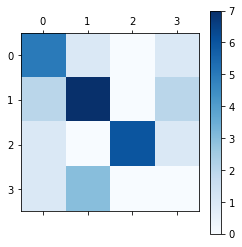

In [94]:
import matplotlib.pyplot as plt

plt.matshow(cm, cmap='Blues')
plt.colorbar()

### Visualizing the Decision Tree

We'll visualize the learned decision tree using graphviz, to see what type of rules it has learnt from the training data.

https://graphviz.readthedocs.io/en/stable/api.html

In [105]:
from sklearn.tree import export_graphviz
import graphviz

def visualize_tree(fitted_tree, feature_names, target_names, filename):
    """
    Args:
        fitted_tree: the fitted decision tree. If using ensemble methods
            pick the first estimator using model.estimators[0]
        feature_names: array containing the feature names
        target_names: array containing the target labels
        filename: the filename to save the .dot file
    """
    export_graphviz(fitted_tree, out_file=filename,
                    feature_names=feature_names,
                    class_names=target_names,
                    filled=True, rounded=True)

    source = graphviz.Source.from_file(filename)
    source.render(view=True)

In [106]:
feature_names=['rnd_expenditure', 'type_of_expenditure', 'type_of_cost']
target_names=df['sector'].unique()
filename = 'govt_sector_by_expenditure_tree.dot'

visualize_tree(dtc, feature_names, target_names, filename)

## Exercise - Decision Tree Classification using Entropy

Repeat the steps above to:
1. Train a decision tree using the 'entropy' criteria using the training set
2. Evaluate the classification metrics
3. Visualize the decision tree

Which criteria performs better?

In [ ]:
# Your code here















## Visualizing Decision Tree Surfaces

Here's a neat trick to try in lieu of what we saw with clustering.

Credits: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

In [129]:
# Adapted from: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
import numpy as np

def plot_decision_surface(classifier, n_classes, X, y, title):
    """Plots a decision surface using pair-wise combination
    of features
    Args:
        classifier - the decision tree classifier
        n_classes - the number of classes
        X - the data
        y - the labels
        title - the plot title
    """
    plot_colors = 'ryb'
    plot_step = 0.02

    plt.figure(figsize=(15, 10))

    for pairidx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):
        # We only take the two corresponding features
        x = X.values[:, pair]

        clf = classifier.fit(x, y)

        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(feature_names[pair[0]])
        plt.ylabel(feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(x[idx, 0], x[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle(title)
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

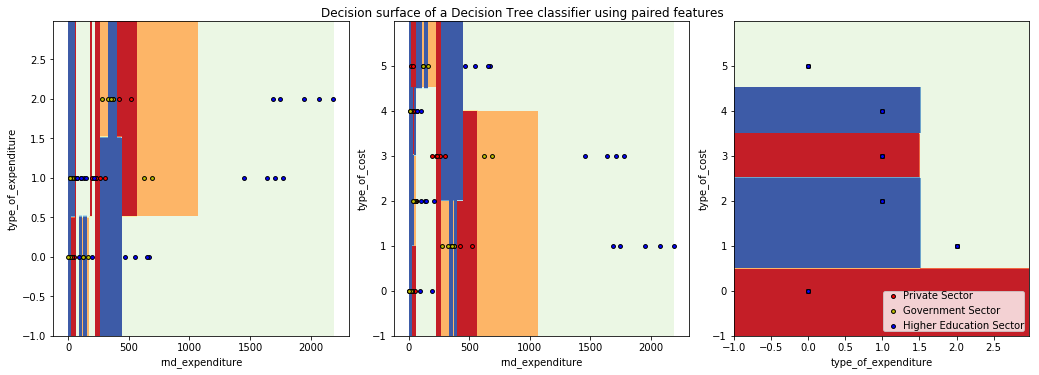

In [112]:
n_classes = len(target.unique())
plot_decision_surface(DecisionTreeClassifier(), n_classes, train_X, train_y,
                      "Decision surface of a Decision Tree classifier using paired features")

In [46]:
# To get the category label mapping
df[['type_of_expenditure', 'type_of_expenditure_c']].drop_duplicates()

,type_of_expenditure,type_of_expenditure_c
0,Capital Expenditure,0
2,Manpower Expenditure,1
5,Other Operating Expenditure,2


In [47]:
df[['type_of_cost', 'type_of_cost_c']].drop_duplicates()

,type_of_cost,type_of_cost_c
0,"Land, Buildings & Other Structures",0
1,"Vehicles, Plant, Machinery & Equipment",5
2,Researchers,3
3,Technicians,4
4,Other Supporting Staff,2
5,Other Operating Costs,1


In [52]:
df[['sector', 'sector_c']].drop_duplicates()

,sector,sector_c
0,Private Sector,2
6,Government Sector,0
12,Higher Education Sector,1
18,Public Research Institutes,3


## Random Forest Classifier with GridSearchCV

Now that we have our baseline tree, the next step is to try an ensemble method, such as Random Forest.

Let's also maximize our chances of getting the best model by doing Grid Search cross-validation.

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [130]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier?

In [165]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to select the optimum hyperparameters
gs_rfc = GridSearchCV(RandomForestClassifier(), {'max_depth': [2, 4, 6, 8],
                                                 'n_estimators': [5, 10, 20, 30]},
                      verbose=1)

gs_rfc.fit(train_X, train_y)

# select the best estimator
print('Best score:', gs_rfc.best_score_)
print('Best parameters:', gs_rfc.best_params_)

# predict
pred_y = gs_rfc.predict(test_X)

# evaluation metrics
print(classification_report(test_y, pred_y))
cm = confusion_matrix(test_y, pred_y)
print(cm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best score: 0.6555555555555556
Best parameters: {'max_depth': 8, 'n_estimators': 30}
             precision    recall  f1-score   support

          0       0.62      0.71      0.67         7
          1       0.60      0.55      0.57        11
          2       1.00      0.88      0.93         8
          3       0.20      0.25      0.22         4

avg / total       0.66      0.63      0.64        30

[[5 1 0 1]
 [2 6 0 3]
 [1 0 7 0]
 [0 3 0 1]]


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.7s finished


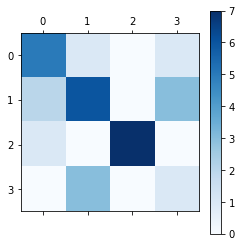

In [166]:
plt.matshow(cm, cmap='Blues')
plt.colorbar()

In [167]:
gs_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [168]:
gs_rfc.best_estimator_.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1789122070, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=772170125, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fract

In [169]:
# Visualize the first tree in the forest
rfc = gs_rfc.best_estimator_

visualize_tree(rfc.estimators_[0], feature_names, target_names,
               'govt_sector_by_expenditure_rf_first.dot')

In [170]:
# Visualize the last tree in the forest
visualize_tree(rfc.estimators_[-1], feature_names, target_names,
               'govt_sector_by_expenditure_rf_last.dot')

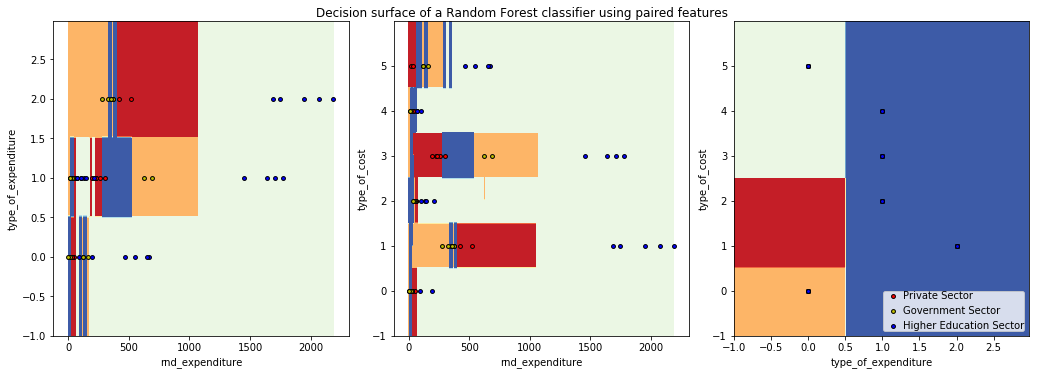

In [171]:
# Plot the decision surface for pair-wise features, using
# the best estimator found by GridSearchCV
best_n_estimators = n_estimators=gs_rfc.best_params_['n_estimators']
best_max_depth = n_estimators=gs_rfc.best_params_['max_depth']

plot_decision_surface(RandomForestClassifier(n_estimators=best_n_estimators,
                                             max_depth=best_max_depth),
                      n_classes, train_X, train_y,
                      "Decision surface of a Random Forest classifier using paired features")

## XGBoost Classifier with GridSearchCV
 
Finally, let's try XGBoost on our dataset, to see how well it does.

### Setup

XGBoost is a separate library from sklearn (https://xgboost.readthedocs.io/en/latest/build.html)

```
conda install -c anaconda py-xgboost
```

### XGBoost and Scikit-learn

XGBoost has its own API, but includes an sklearn wrapper for convenience.

https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

In [172]:
import xgboost as xgb

# Use GridSearchCV to select the optimum hyperparameters
gs_xgb = GridSearchCV(xgb.XGBClassifier(), {'max_depth': [2, 4, 6, 8],
                                            'n_estimators': [5, 10, 20, 30]},
                      verbose=1)

gs_xgb.fit(train_X, train_y)

# select the best estimator
print('Best score:', gs_xgb.best_score_)
print('Best parameters:', gs_xgb.best_params_)

# predict
pred_y = gs_xgb.predict(test_X)

# evaluation metrics
print(classification_report(test_y, pred_y))
cm = confusion_matrix(test_y, pred_y)
print(cm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\e

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\e

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\e

Best score: 0.5666666666666667
Best parameters: {'max_depth': 4, 'n_estimators': 20}
             precision    recall  f1-score   support

          0       0.50      0.57      0.53         7
          1       0.57      0.36      0.44        11
          2       1.00      0.75      0.86         8
          3       0.22      0.50      0.31         4

avg / total       0.62      0.53      0.56        30

[[4 1 0 2]
 [3 4 0 4]
 [1 0 6 1]
 [0 2 0 2]]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.7s finished
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not 

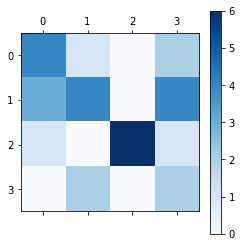

In [173]:
plt.matshow(cm, cmap='Blues')
plt.colorbar()

## Workshop: Regression with Decision Trees

